In [1]:
# prompt: 구글 코랩 마운트하기

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
import os

In [3]:
#합쳐진 데이터셋 불러오기
new_no_null_csv=os.listdir("/content/drive/MyDrive/no_na_data")
new_no_null_df=[]
test_df=[]
start_time="2017-01-01 01:00:00"
end_time="2023-02-28 23:00:00"
time=pd.date_range(start=start_time,end=end_time,freq="H")
print(len(time))
for concat_csv_path in new_no_null_csv:


    path="/content/drive/MyDrive/no_na_data/"
    c_df=pd.read_csv(path+f"{concat_csv_path}") #station의 데이터 이름에 데이터 프레임 저장하기
    print(len(c_df))
    c_df["date"]=time
    new_no_null_df.append(c_df[:-24*3])
    test_df.append(c_df[-24*3:])
    print(c_df.columns)



53999
53999
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       'date'],
      dtype='object')
53999
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date'], dtype='object')
53999
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '적설', 'date'],
      dtype='object')
53999
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       '풍향', 'date'],
      dtype='object')
53999
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '풍향', 'date'],
      dtype='object')
53999
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', '전운량', '풍향',
       'date'],
      dtype='object')
53999
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', 'date'], dtype='object')
53999
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '적설', 'date'],
      dtype='object')
53999
Index

In [44]:
test_df[0]

,Solar_Power(MWh),일사,일조,습도,지면온도,시정,기온,중하층운량,풍속,date
53927,4.30,0.00,0.0,87.0,-2.5,2677.0,-9.8,0.0,0.3,2023-02-26 00:00:00
53928,1.78,0.00,0.0,88.0,-3.3,2227.0,-10.8,0.0,0.0,2023-02-26 01:00:00
53929,0.39,0.00,0.0,89.0,-3.8,2598.0,-10.7,0.0,0.9,2023-02-26 02:00:00
53930,0.00,0.00,0.0,85.0,-4.5,3469.0,-10.9,0.0,0.0,2023-02-26 03:00:00
53931,0.00,0.00,0.0,87.0,-5.1,2661.0,-12.2,0.0,0.5,2023-02-26 04:00:00
...,...,...,...,...,...,...,...,...,...,...
53994,54.75,0.01,0.0,38.0,-0.4,4128.0,3.4,0.0,6.6,2023-02-28 19:00:00
53995,74.80,0.00,0.0,55.0,-0.5,2925.0,2.5,0.0,5.2,2023-02-28 20:00:00
53996,73.18,0.00,0.0,67.0,-0.7,2208.0,1.7,0.0,4.9,2023-02-28 21:00:00
53997,49.00,0.00,0.0,76.0,-0.7,2009.0,1.2,0.0,5.9,2023-02-28 22:00:00


In [4]:
import re

In [5]:
names=[]
for i in new_no_null_csv:



    pattern=r".*_(.*?)\.csv"
    name=re.findall(pattern,i)[0]
    names.append(name)


In [6]:
names

['강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주시',
 '대구시',
 '서울시',
 '부산시',
 '대전시',
 '울산시',
 '세종시',
 '전라남도',
 '인천시',
 '전라북도',
 '충청남도',
 '제주도',
 '충청북도']

In [ ]:
pip install pandas numpy matplotlib scikit-learn tensorflow


In [7]:

from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split



In [8]:
from tensorflow.keras.optimizers import Adam

In [ ]:
for clurstering_df in new_no_null_df:
  scaler = RobustScaler()
  data_scaled = scaler.fit_transform(clurstering_df[['일사', '일조']])
  # 클러스터 수를 달리하면서 KMeans 적용 및 Inertia 계산
  inertia_values = []
  K = range(1, 11)  # 1부터 10까지 클러스터 수에 대해 테스트

  for k in K:
      kmeans = KMeans(n_clusters=k, random_state=42)
      kmeans.fit(data_scaled)
      inertia_values.append(kmeans.inertia_)

  # Inertia 값 시각화
  plt.figure(figsize=(8, 5))
  plt.plot(K, inertia_values, 'bo-', markersize=8)
  plt.xlabel('Number of Clusters (k)')
  plt.ylabel('Inertia')
  plt.title('Elbow Method For Optimal k')
  plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [10]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import matplotlib as mpl

# 나눔고딕 폰트 다운로드 및 설치 (Google Colab 환경에서만 필요)
!apt-get update -qq
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 나눔고딕 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 그래프를 그릴 때 마이너스 폰트 설정이 깨지는 문제 해결
mpl.rcParams['axes.unicode_minus'] = False

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 56 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (4,898 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123598 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new ca

In [11]:
# 폰트가 제대로 설치되었는지 확인
print(f"설치된 폰트 경로: {font_path}")
print(f"파일 존재 여부: {os.path.exists(font_path)}")

# 폰트 설정
font_name = font_manager.FontProperties(fname=font_path).get_name()
print(f"설치된 폰트 이름: {font_name}")
rc('font', family=font_name)

설치된 폰트 경로: /usr/share/fonts/truetype/nanum/NanumGothic.ttf
파일 존재 여부: True
설치된 폰트 이름: NanumGothic


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       'date'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_1',
       'lag_2', 'rolling_mean'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_1',
       'lag_2', 'rolling_mean'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속', 'Cluster', 'year',
       'month', 'day', 'dayofweek', 'lag_1', 'lag_2', 'rolling_mean'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


KeyboardInterrupt: 

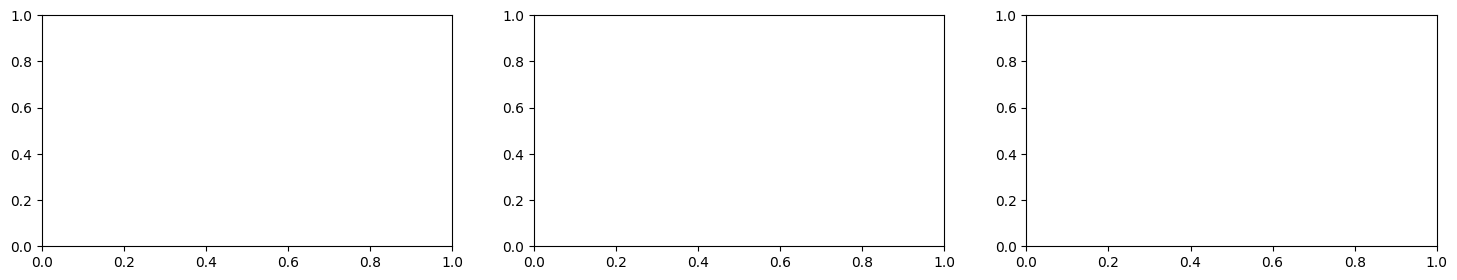

In [12]:
from math import e
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from lightgbm import LGBMRegressor
from joblib import dump
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.font_manager as font_manager

def smape(y_true, y_pred):
    epsilon = 1e-8  # 아주 작은 값
    y_true = np.where((y_true == 0) & (y_pred == 0), epsilon, y_true)
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

def mape(y_true, y_pred):
    epsilon = 1e-8  # 아주 작은 값
    y_true = np.where((y_true == 0) & (y_pred == 0), epsilon, y_true)
    return 100 * np.mean(np.abs((y_true - y_pred) / y_true))

# 데이터 로드 및 전처리

for data, name in zip(new_no_null_df, names):
    data['date'] = pd.to_datetime(data['date'])
    print("데이터 로드 및 전처리")
    print(data.columns)


    # 최적의 군집 수 설정 (엘보우 그래프 참고)
    optimal_clusters = 3

    # 데이터 스케일링 및 KMeans 클러스터링
    scaler = RobustScaler()
    # data_scaled = scaler.fit_transform(data.drop('시간',axis=1))
    data_scaled = scaler.fit_transform(data[["일사","일조"]])
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42).fit(data_scaled)
    data['Cluster'] = kmeans.labels_

    # KMeans 모델 저장
    dump(kmeans, f'/content/drive/MyDrive/new_model/kmeans/kmeans_model_{name}.joblib')

    # Sample parameter grid for RandomizedSearchCV
    param_grid = {
        'num_leaves': [31, 50, 70],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 200, 500]
    }

    rmse_scores = []
    mae_scores = []
    smape_scores = []
    mape_scores = []
    best_params_list = []  # 각 클러스터의 최적 하이퍼파라미터 저장

    fig, axes = plt.subplots(1, optimal_clusters, figsize=(6 * optimal_clusters, 3))

    # 예측값을 저장할 빈 리스트 생성
    predict_list=[0]*len(data)
    # 날짜 피처 생성
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['dayofweek'] = data['date'].dt.dayofweek

    # 과거 값 (lag) 피처 생성
    data['lag_1'] = data['Solar_Power(MWh)'].shift(1)
    data['lag_2'] = data['Solar_Power(MWh)'].shift(2)
    data['rolling_mean'] = data['Solar_Power(MWh)'].rolling(window=3).mean()
    print("과거 값 피처 생성후 ")
    print(data.columns)

    for cluster in np.unique(data['Cluster']):
        cluster_data = data[data['Cluster'] == cluster].reset_index(drop=True)
        print("클러스터 라벨 붙인 후 ")
        print(cluster_data.columns)
        if "predict" in cluster_data.columns:
            cluster_data.drop("predict",axis=1,inplace=True)
        else:
          pass
        # LightGBM 모델
        X_lightgbm = cluster_data.drop(columns=['Solar_Power(MWh)', 'date'])
        y_lightgbm = cluster_data['Solar_Power(MWh)'].values.reshape(-1, 1)
        print("lightgbm모델 돌리기 전")
        print(X_lightgbm.columns)
        scaler_X = RobustScaler()
        scaler_y = RobustScaler()

        X_lightgbm_scaled = scaler_X.fit_transform(X_lightgbm)
        y_lightgbm_scaled = scaler_y.fit_transform(y_lightgbm)

        X_train_lgb, X_test_lgb, y_train_lgb, y_test_lgb = train_test_split(X_lightgbm_scaled, y_lightgbm_scaled, test_size=0.2, random_state=42)

        model = LGBMRegressor(random_state=42)

        # RandomizedSearchCV를 사용하여 하이퍼파라미터 튜닝
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, random_state=42)

        random_search.fit(X_train_lgb, y_train_lgb.ravel())

        best_model = random_search.best_estimator_

        # 최적 하이퍼파라미터 저장
        best_params_list.append(random_search.best_params_)

        # 모델 저장
        dump(best_model, f'/content/drive/MyDrive/new_model/lightgbm/lightgbm_cluster_{cluster}_{name}.joblib')

        # 예측
        y_pred_lgb = best_model.predict(X_test_lgb)

        # 예측값을 원래 스케일로 복원
        y_test_orig = scaler_y.inverse_transform(y_test_lgb)
        y_pred_lgb_original = scaler_y.inverse_transform(y_pred_lgb.reshape(-1, 1))

        # 0 미만의 예측 값을 0으로 처리
        y_pred_lgb_original = np.maximum(0, y_pred_lgb_original)

        rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_lgb_original))
        mae = mean_absolute_error(y_test_orig, y_pred_lgb_original)
        smape_val = smape(y_test_orig, y_pred_lgb_original)
        mape_val = mape(y_test_orig, y_pred_lgb_original)

        rmse_scores.append(rmse)
        mae_scores.append(mae)
        smape_scores.append(smape_val)
        mape_scores.append(mape_val)

        axes[cluster].plot(y_test_orig, label='Actual')
        axes[cluster].plot(y_pred_lgb_original, label='Predicted')
        axes[cluster].set_title(f'{name}_Cluster {cluster} - Actual vs Predicted (LightGBM)', fontproperties=font_manager.FontProperties(fname=font_path))
        axes[cluster].set_xlabel('Samples')
        axes[cluster].set_ylabel('Solar Power (MWh)')
        axes[cluster].legend()

        # 클러스터 전체 데이터 예측 및 원래 스케일로 복원
        cluster_predict_scaled = best_model.predict(scaler_X.transform(cluster_data.drop(columns=['Solar_Power(MWh)', 'date'])))
        cluster_predict = scaler_y.inverse_transform(cluster_predict_scaled.reshape(-1, 1))

        # 0 미만의 예측 값을 0으로 처리
        cluster_predict = np.maximum(0, cluster_predict)

        predict_list.append(cluster_predict)

        print("마지막으로 모델 다 돌린 후 cluster")
        print(cluster_data.columns)


        print("마지막으로 모델 다 돌린 후 data")
        print(data.columns)

        # 예측값을 데이터프레임에 추가
        data.loc[data['Cluster'] == cluster, 'predict'] = cluster_predict
        print("예측값을 데이터프레임에 추가")
        print(data.columns)


    plt.tight_layout()
    plt.savefig(f'/content/drive/MyDrive/new_model/train_pic/{name}_clusters_prediction.png')
    plt.show()


    print(f"{name}_RMSE scores:", rmse_scores)
    print(f"{name}_MAE scores:", mae_scores)
    print(f"{name}_SMAPE scores:", smape_scores)
    print(f"{name}_MAPE scores:", mape_scores)
    print(f"{name}_Average RMSE:", np.mean(rmse_scores))
    print(f"{name}_Average MAE:", np.mean(mae_scores))
    print(f"{name}_Average SMAPE:", np.mean(smape_scores))
    print(f"{name}_Average MAPE:", np.mean(mape_scores))


    # 각 클러스터의 최적 하이퍼파라미터 출력
    for cluster, params in enumerate(best_params_list):
        print(f"{name}_Cluster {cluster} Best Params:", params)
    print("모델 돌린 후 최종 칼럼")
    print(data.columns)

    # 예측 결과 데이터프레임 리스트에 추가
    # predict_asemble_data.append(data)
    data.to_csv(f"/content/drive/MyDrive/new_model/predicted_data/predicted_concat_data_{name}.csv")
    plt.plot(data["date"], data["Solar_Power(MWh)"],data["date"],data["predict"] , 'r-')

    plt.show()


In [ ]:
 ### Test 해보기

In [ ]:
import joblib

In [18]:
test_path=os.listdir("/content/drive/MyDrive/new_model/predicted_data")
test_df_list=[]
for path in test_path:
  test_df=pd.read_csv(f"/content/drive/MyDrive/new_model/predicted_data/{path}")
  test_df_list.append(test_df)


In [ ]:


def smape(y_true, y_pred):
    epsilon = 1e-8  # 아주 작은 값
    y_true = np.where((y_true == 0) & (y_pred == 0), epsilon, y_true)
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

def mape(y_true, y_pred):
    epsilon = 1e-8  # 아주 작은 값
    y_true = np.where((y_true == 0) & (y_pred == 0), epsilon, y_true)
    return 100 * np.mean(np.abs((y_true - y_pred) / y_true))

# 데이터 로드 및 전처리

for data, name in zip(test_df_list, names):
    data['date'] = pd.to_datetime(data['date'])
    print("데이터 로드 및 전처리")
    print(data.columns)


    # 최적의 군집 수 설정 (엘보우 그래프 참고)
    optimal_clusters = 3

    # 데이터 스케일링 및 KMeans 클러스터링
    scaler = RobustScaler()
    # data_scaled = scaler.fit_transform(data.drop('시간',axis=1))
    data_scaled = scaler.fit_transform(data[["일사","일조"]])
    clustermodel=joblib.load(f'/content/drive/MyDrive/new_model/kmeans/kmeans_model_{name}.joblib')
    kmeans =clustermodel.predict(data_scaled)
    # data['Cluster'] = kmeans.labels_
    data['Cluster'] = kmeans

    rmse_scores = []
    mae_scores = []
    smape_scores = []
    mape_scores = []


    fig, axes = plt.subplots(1, optimal_clusters, figsize=(6 * optimal_clusters, 3))

    # 예측값을 저장할 빈 리스트 생성
    predict_list=[0]*len(data)
    # 날짜 피처 생성
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['dayofweek'] = data['date'].dt.dayofweek

    # 과거 값 (lag) 피처 생성
    data['lag_1'] = data['Solar_Power(MWh)'].shift(1)
    data['lag_2'] = data['Solar_Power(MWh)'].shift(2)
    data['rolling_mean'] = data['Solar_Power(MWh)'].rolling(window=3).mean()
    print("과거 값 피처 생성후 ")
    print(data.columns)

    for cluster in np.unique(data['Cluster']):
        cluster_data = data[data['Cluster'] == cluster].reset_index(drop=True)
        print("클러스터 라벨 붙인 후 ")
        print(cluster_data.columns)
        if "predict" in cluster_data.columns:
            cluster_data.drop("predict",axis=1,inplace=True)
        else:
          pass
        # LightGBM 모델
        X_lightgbm = cluster_data.drop(columns=['Solar_Power(MWh)', 'date'])
        y_lightgbm = cluster_data['Solar_Power(MWh)'].values.reshape(-1, 1)
        print("lightgbm모델 돌리기 전")
        print(X_lightgbm.columns)
        scaler_X = RobustScaler()
        scaler_y = RobustScaler()

        X_lightgbm_scaled = scaler_X.fit_transform(X_lightgbm)
        y_lightgbm_scaled = scaler_y.fit_transform(y_lightgbm)

        best_model=joblib.load(f'/content/drive/MyDrive/new_model/lightgbm/lightgbm_cluster_{cluster}_{name}.joblib')

        # 예측
        y_pred_lgb = best_model.predict(X_lightgbm_scaled)

        # 예측값을 원래 스케일로 복원
        y_test_orig = scaler_y.inverse_transform(y_lightgbm_scaled) # test
        y_pred_lgb_original = scaler_y.inverse_transform(y_pred_lgb.reshape(-1, 1)) # test 예측

        # 0 미만의 예측 값을 0으로 처리
        y_pred_lgb_original = np.maximum(0, y_pred_lgb_original)

        rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_lgb_original))
        mae = mean_absolute_error(y_test_orig, y_pred_lgb_original)
        smape_val = smape(y_test_orig, y_pred_lgb_original)
        mape_val = mape(y_test_orig, y_pred_lgb_original)

        rmse_scores.append(rmse)
        mae_scores.append(mae)
        smape_scores.append(smape_val)
        mape_scores.append(mape_val)

        axes[cluster].plot(y_test_orig, label='Actual')
        axes[cluster].plot(y_pred_lgb_original, label='Predicted')
        axes[cluster].set_title(f'{name}_Cluster {cluster} - Actual vs Predicted (LightGBM)', fontproperties=font_manager.FontProperties(fname=font_path))
        axes[cluster].set_xlabel('Samples')
        axes[cluster].set_ylabel('Solar Power (MWh)')
        axes[cluster].legend()

        # # 클러스터 전체 데이터 예측 및 원래 스케일로 복원
        # cluster_predict_scaled = best_model.predict(scaler_X.transform(cluster_data.drop(columns=['Solar_Power(MWh)', 'date'])))
        # cluster_predict = scaler_y.inverse_transform(cluster_predict_scaled.reshape(-1, 1))

        # # 0 미만의 예측 값을 0으로 처리
        # cluster_predict = np.maximum(0, cluster_predict)



        print("마지막으로 모델 다 돌린 후 cluster")
        print(cluster_data.columns)


        print("마지막으로 모델 다 돌린 후 data")
        print(data.columns)

        # 예측값을 데이터프레임에 추가
        data.loc[data['Cluster'] == cluster, 'predict'] = y_pred_lgb_original
        print("예측값을 데이터프레임에 추가")
        print(data.columns)


    plt.tight_layout()
    plt.savefig(f'/content/drive/MyDrive/new_model/train_pic/{name}_clusters_prediction.png')
    plt.show()


    print(f"{name}_RMSE scores:", rmse_scores)
    print(f"{name}_MAE scores:", mae_scores)
    print(f"{name}_SMAPE scores:", smape_scores)
    print(f"{name}_MAPE scores:", mape_scores)
    print(f"{name}_Average RMSE:", np.mean(rmse_scores))
    print(f"{name}_Average MAE:", np.mean(mae_scores))
    print(f"{name}_Average SMAPE:", np.mean(smape_scores))
    print(f"{name}_Average MAPE:", np.mean(mape_scores))


    # 각 클러스터의 최적 하이퍼파라미터 출력
    for cluster, params in enumerate(best_params_list):
        print(f"{name}_Cluster {cluster} Best Params:", params)
    print("모델 돌린 후 최종 칼럼")
    print(data.columns)

    # 예측 결과 데이터프레임 리스트에 추가
    # predict_asemble_data.append(data)
    data.to_csv(f"/content/drive/MyDrive/new_model/predicted_data/predicted_concat_data_{name}.csv")
    plt.plot(data["date"], data["Solar_Power(MWh)"],data["date"],data["predict"] , 'r-')

    plt.show()
